In [4]:
import warnings
warnings.simplefilter("ignore")

In [5]:
import pandas as pd
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
list1=['Sex','Age','Ticket','Cabin','Embarked']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

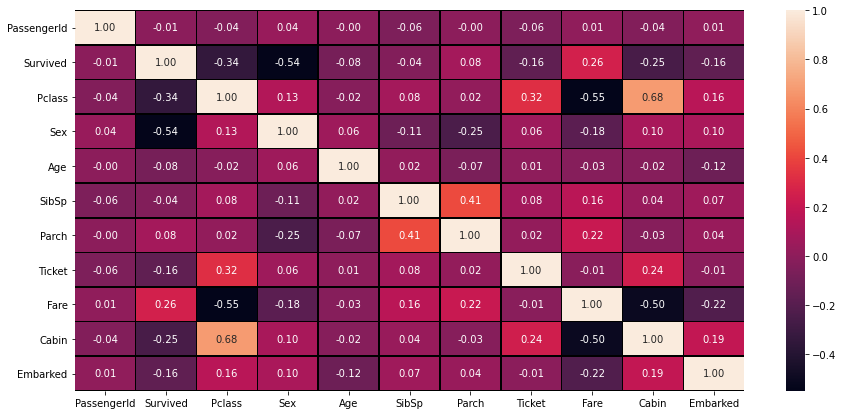

In [11]:
#EDA
import seaborn as sn
import matplotlib.pyplot as plt 

corr=df.corr()
plt.figure(figsize=(15,7))
sn.heatmap(corr,annot=True,linewidths=0.5,linecolor="black",fmt=".2f")
plt.show()

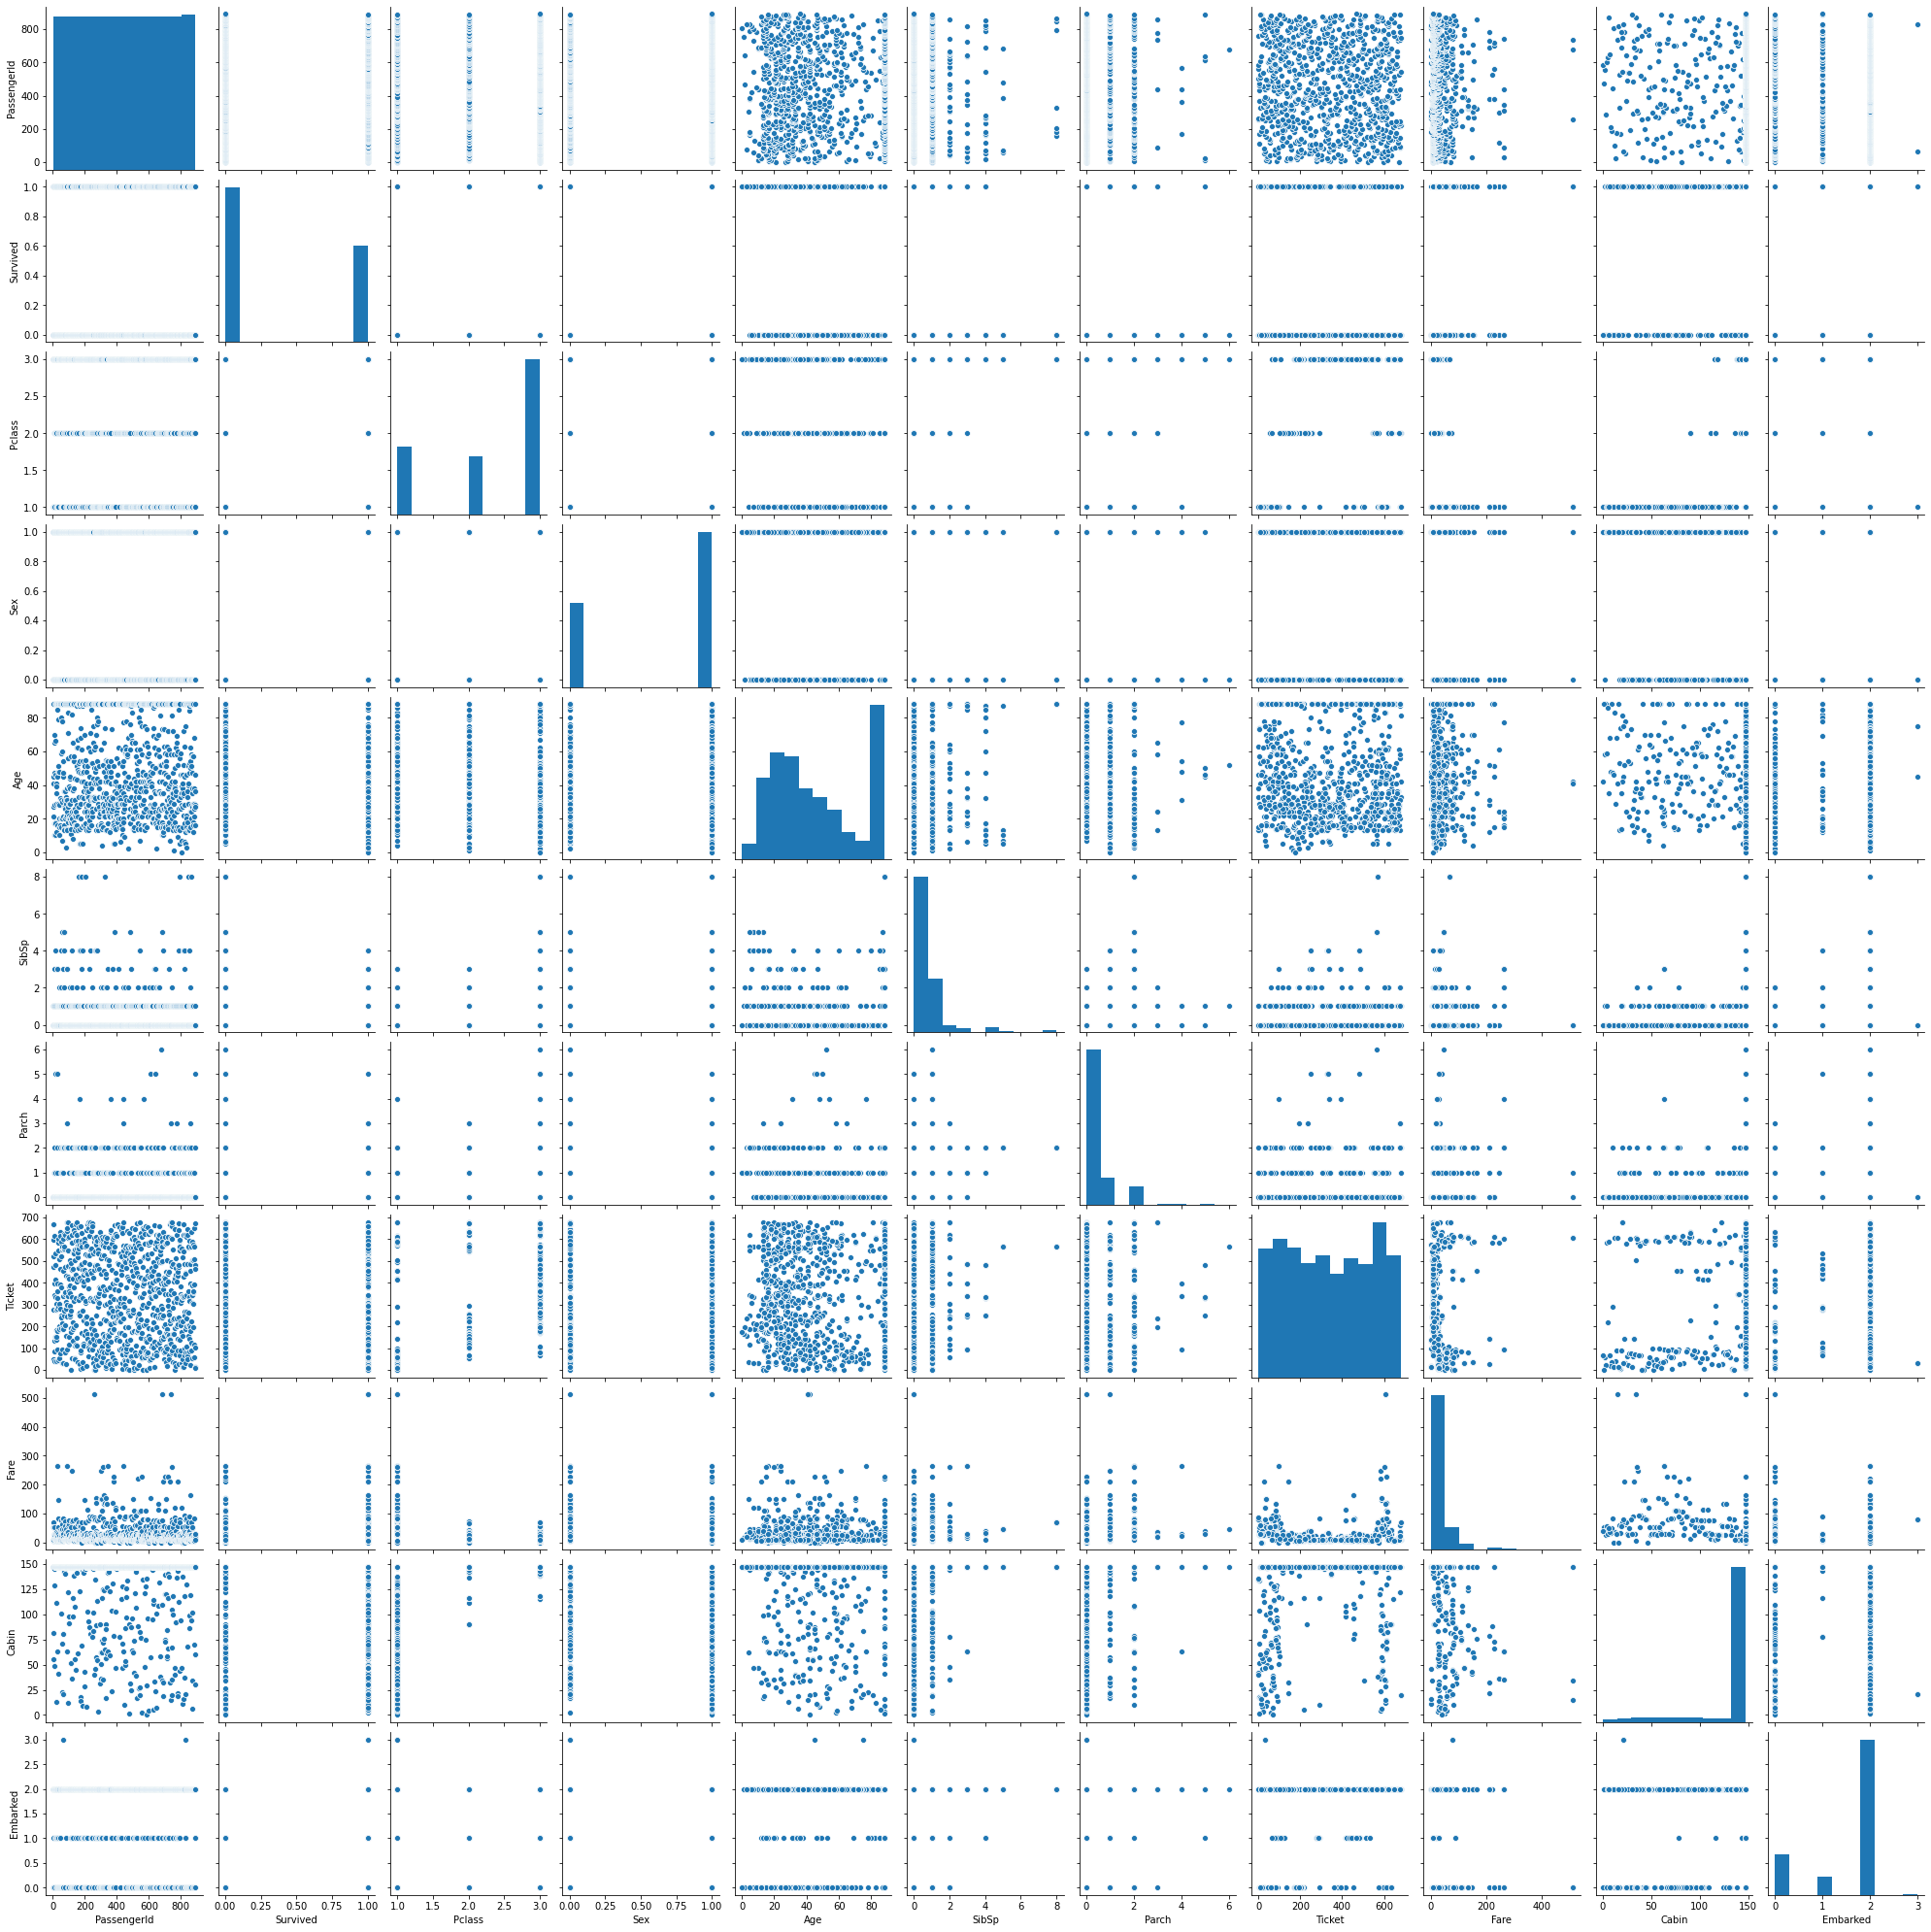

In [12]:
sn.pairplot(df)

AttributeError: 'function' object has no attribute 'loc'

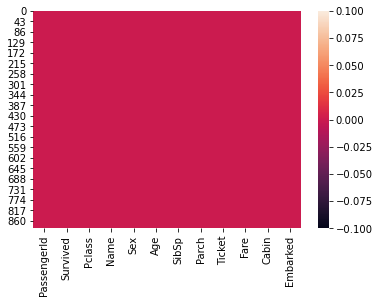

In [13]:
sn.heatmap(df.isnull())
print(df.drop.loc['Age'])
plt.show()

In [14]:
x=df[['Pclass','Parch','Fare']]
y=df['Survived']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_trained, x_test , y_trained, y_test = train_test_split(x,y,test_size=.4,random_state=101)

In [16]:
lm = LogisticRegression()
lm.fit(x_trained,y_trained)
pp=(lm.coef_)
pp

array([[-0.65269852,  0.12564364,  0.00866346]])

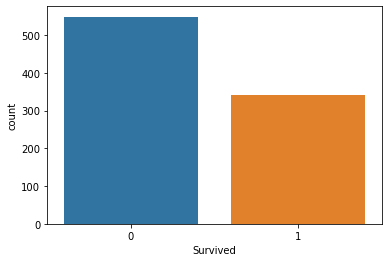

In [17]:
sn.countplot(x="Survived",data=df)
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
def svmkernel(ker):
    svc=SVC(kernel='poly')
    svc.fit(x_trained,y_trained)
    svc.score(x_trained,y_trained)
    predsvc=svc.predict(x_test)
    print('Accuarcy Score:','\n',accuracy_score(y_test,predsvc))
    print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,predsvc))
    print('\n','Classification Report','\n','\n',classification_report(y_test,predsvc))

In [19]:
svmkernel('poly')

Accuarcy Score: 
 0.6022408963585434

 Confusion Matrix: 
 
 [[200   7]
 [135  15]]

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.60      0.97      0.74       207
           1       0.68      0.10      0.17       150

    accuracy                           0.60       357
   macro avg       0.64      0.53      0.46       357
weighted avg       0.63      0.60      0.50       357



In [20]:
svmkernel('rbf')

Accuarcy Score: 
 0.6022408963585434

 Confusion Matrix: 
 
 [[200   7]
 [135  15]]

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.60      0.97      0.74       207
           1       0.68      0.10      0.17       150

    accuracy                           0.60       357
   macro avg       0.64      0.53      0.46       357
weighted avg       0.63      0.60      0.50       357



In [21]:
mnb=MultinomialNB()
mnb.fit(x_trained,y_trained)
predmnb=mnb.predict(x_test)
print('Accuarcy Score:','\n','\n',accuracy_score(y_test,predmnb),'\n')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,predmnb))
print('\n','Classification Report','\n','\n',classification_report(y_test,predmnb))

Accuarcy Score: 
 
 0.6610644257703081 


 Confusion Matrix: 
 
 [[171  36]
 [ 85  65]]

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.67      0.83      0.74       207
           1       0.64      0.43      0.52       150

    accuracy                           0.66       357
   macro avg       0.66      0.63      0.63       357
weighted avg       0.66      0.66      0.65       357



In [22]:
dtc=DecisionTreeClassifier()
dtc.fit(x_trained,y_trained)
dtc.score(x_trained,y_trained)
preddtc=dtc.predict(x_test)
print('Accuarcy Score:','\n','\n',accuracy_score(y_test,preddtc),'\n')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,preddtc))
print('\n','Classification Report','\n','\n',classification_report(y_test,preddtc))

Accuarcy Score: 
 
 0.6666666666666666 


 Confusion Matrix: 
 
 [[179  28]
 [ 91  59]]

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.66      0.86      0.75       207
           1       0.68      0.39      0.50       150

    accuracy                           0.67       357
   macro avg       0.67      0.63      0.62       357
weighted avg       0.67      0.67      0.64       357



In [23]:
knn=KNeighborsClassifier()
knn.fit(x_trained,y_trained)
knn.score(x_trained,y_trained)
predknn=knn.predict(x_test)
print('Accuarcy Score:','\n','\n',accuracy_score(y_test,predknn),'\n')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,predknn))
print('\n','Classification Report','\n','\n',classification_report(y_test,predknn))

Accuarcy Score: 
 
 0.6750700280112045 


 Confusion Matrix: 
 
 [[174  33]
 [ 83  67]]

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.68      0.84      0.75       207
           1       0.67      0.45      0.54       150

    accuracy                           0.68       357
   macro avg       0.67      0.64      0.64       357
weighted avg       0.67      0.68      0.66       357



In [31]:
parameters={"max_iter": [500,700,900,1100,1200,1300,1400,1500],
           "alpha": [0.0001,0.001,0.01,0.1,1,10,100],
           "penalty": ["elasticnet","11","l2"]}

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_trained,y_trained)
y_pred=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvsscore=cross_val_score(SGDRegressor(),x_trained,y_trained,cv=5).mean()
print(f"Accuracy={r2score*100},Cross_val_score = {cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")


GCV=GridSearchCV(SGDRegressor(),parameters,cv=5,scoring='r2')
GCV.fit(x_trained,y_trained)
GCV.best_estimator_
GCV_pred=GCV.best_predict(x_test)
print('Final Accuracy Score:',r2_score(y_test,GCV_pred)*100)

NameError: name 'r2_score' is not defined

In [ ]:
df.skew()
